In [77]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn

In [2]:
!ls data/

12eofinextract990.zip     15eofinextractEZ.dat      py12_990.dat
12eofinextract990ez.zip   16eofinextract990.dat     py12_990ez.dat
13eofinextract990.zip     16eofinextractdoc.xls     py13_990.dat
13eofinextract990ez.zip   16eofinextractez.dat      py13_EZ.dat
14eofinextract990.zip     index_2016.csv            py14_990.dat
14eofinextract990ez.zip   index_2016.json           py14_EZ.dat
15eofinextract990.dat.dat newdata


# Look at 2016 MROs

In [3]:
df = pd.read_csv('data/16eofinextract990.dat', sep=' ')
df.head()

,elf,EIN,tax_pd,subseccd,s501c3or4947a1cd,schdbind,politicalactvtscd,lbbyingactvtscd,subjto6033cd,dnradvisedfundscd,...,exceeds1pct509,subtotpub509,pubsupplesub509,samepubsuppsubtot509,grsinc509,unreltxincls511tx509,subtotsuppinc509,netincunrelatd509,othrinc509,totsupp509
0,Y,382032501,201506,3,Y,N,N,N,N,N,...,0,0,1755907,1755907,2,0,2,0,228,1756137
1,Y,263010938,201412,3,Y,N,N,N,N,N,...,0,0,0,0,0,0,0,0,0,0
2,Y,942746487,201506,3,Y,Y,N,N,N,N,...,483736,1253627,12678334,13931961,7673,0,7673,0,48581,13988215
3,Y,112889774,201506,3,Y,Y,N,N,N,N,...,0,0,161158693,161158693,478028,0,478028,0,57768,161694489
4,Y,263416084,201506,3,Y,Y,N,N,N,N,...,0,0,881513,881513,0,0,0,0,0,881513


In [5]:
df.nonpfrea.value_counts()

7     99831
9     85654
0     77668
2     15530
12     9027
3      4030
1      3788
13     2812
14     2618
15     2111
6      1608
8      1534
4       571
5       354
11      346
10        1
Name: nonpfrea, dtype: int64

In [7]:
mros = df.loc[df['nonpfrea'] == 5]

In [8]:
mros.head()

,elf,EIN,tax_pd,subseccd,s501c3or4947a1cd,schdbind,politicalactvtscd,lbbyingactvtscd,subjto6033cd,dnradvisedfundscd,...,exceeds1pct509,subtotpub509,pubsupplesub509,samepubsuppsubtot509,grsinc509,unreltxincls511tx509,subtotsuppinc509,netincunrelatd509,othrinc509,totsupp509
2716,Y,205582784,201609,3,Y,Y,N,N,N,N,...,0,0,0,0,0,0,0,0,0,0
3975,Y,742623309,201608,3,Y,Y,N,N,N,N,...,0,0,0,0,0,0,0,0,0,0
5073,Y,450274828,201606,3,Y,Y,N,N,N,N,...,0,0,0,0,0,0,0,0,0,0
5887,Y,651026739,201606,3,Y,Y,N,N,N,N,...,0,0,0,0,0,0,0,0,0,0
8471,Y,954815593,201512,3,Y,N,N,N,N,N,...,0,0,0,0,0,0,0,0,0,0


In [10]:
mros.shape, df.shape

((354, 246), (307483, 246))

In [11]:
!mkdir -p output/

In [12]:
mros.to_csv('output/2016_990_only_mros.tsv', sep='\t')

In [21]:
mros.EIN.nunique()

333

In [19]:
mros.EIN.drop_duplicates().to_csv('output/2016_990_only_mros.EINs.tsv', sep='\t', index=None)

# get list of public XML files

In [17]:
index_1 = pd.read_csv('data/index_2016.csv')
index_1.head()

,﻿RETURN_ID,FILING_TYPE,EIN,TAX_PERIOD,SUB_DATE,TAXPAYER_NAME,RETURN_TYPE,DLN,OBJECT_ID
0,13190365,EFILE,742661023,201412,02/09/2016,HARRIET AND HARMON KELLEY FOUNDATION FOR THE ARTS,990PF,93491315003445,201543159349100344
1,13189948,EFILE,562629114,201412,02/09/2016,BROWN COMMUNITY DEVELOPMENT CORPORATION,990EZ,93492310002195,201543109349200219
2,13191270,EFILE,270678774,201509,02/09/2016,KIWANIS CLUB OF GLENDORA PROJECTS FUND INC,990EZ,93492308002265,201513089349200226
3,13191272,EFILE,464114252,201412,02/09/2016,CONFETTI FOUNDATION,990EZ,93492308002365,201513089349200236
4,13192838,EFILE,510311790,201506,02/10/2016,SHEPHERD PLACE INC,990,93493322003275,201523229349300327


In [20]:
index_1[index_1.EIN.isin(mros.EIN.unique())].shape

(234, 9)

That's significantly fewer than we want

In [23]:
index_1_mros = index_1.loc[index_1.EIN.isin(mros.EIN.unique())]
index_1_mros.head()

,﻿RETURN_ID,FILING_TYPE,EIN,TAX_PERIOD,SUB_DATE,TAXPAYER_NAME,RETURN_TYPE,DLN,OBJECT_ID
2223,13180939,EFILE,134002383,201412,02/05/2016,RUSSELL E WINDSOR RESEARCH FOUNDATN CO ANNA BO...,990,93493308008215,201513089349300821
2761,13182746,EFILE,383075242,201412,02/06/2016,SPARROW CLINICAL RESEARCH INSTITUTE,990,93493316042845,201543169349304284
3641,13088275,EFILE,941562511,201410,01/07/2016,ANESTHESIA RESEARCH FOUNDATION,990,93493258013645,201542589349301364
4716,13096067,EFILE,232880381,201412,01/11/2016,MARKS COLORECTAL SURGICAL FOUNDATION,990,93493300003425,201523009349300342
8142,13099784,EFILE,630754793,201506,01/11/2016,UAB MEDICAL WEST CONTINGENT LIABILITY MANAGEME...,990,93493278000365,201512789349300036


In [24]:
index_1_mros['OBJECT_ID'].apply(lambda x: 'https://s3.amazonaws.com/irs-form-990/%s_public.xml' % x)

2223      https://s3.amazonaws.com/irs-form-990/20151308...
2761      https://s3.amazonaws.com/irs-form-990/20154316...
3641      https://s3.amazonaws.com/irs-form-990/20154258...
4716      https://s3.amazonaws.com/irs-form-990/20152300...
8142      https://s3.amazonaws.com/irs-form-990/20151278...
8727      https://s3.amazonaws.com/irs-form-990/20152302...
8831      https://s3.amazonaws.com/irs-form-990/20153287...
9584      https://s3.amazonaws.com/irs-form-990/20153258...
10677     https://s3.amazonaws.com/irs-form-990/20150281...
12439     https://s3.amazonaws.com/irs-form-990/20152288...
19651     https://s3.amazonaws.com/irs-form-990/20150317...
20124     https://s3.amazonaws.com/irs-form-990/20151324...
26363     https://s3.amazonaws.com/irs-form-990/20150320...
27381     https://s3.amazonaws.com/irs-form-990/20151317...
28736     https://s3.amazonaws.com/irs-form-990/20151317...
31621     https://s3.amazonaws.com/irs-form-990/20151317...
32824     https://s3.amazonaws.com/irs-f

In [25]:
# look at json index (big!)
index_2 = pd.read_json('data/index_2016.json')
index_2.shape

(378420, 1)

In [26]:
import json
from pandas.io.json import json_normalize    

with open('data/index_2016.json', 'r') as f:
    datjson = json.load(f)

In [31]:
index_2 = json_normalize(datjson['Filings2016'])

In [32]:
index_2.shape

(378420, 9)

In [33]:
index_2.head()

,DLN,EIN,FormType,LastUpdated,ObjectId,OrganizationName,SubmittedOn,TaxPeriod,URL
0,93491315003445,742661023,990PF,2016-09-09T23:14:27,201543159349100344,HARRIET AND HARMON KELLEY FOUNDATION FOR THE ARTS,2016-02-09,201412,https://s3.amazonaws.com/irs-form-990/20154315...
1,93492310002195,562629114,990EZ,2016-04-29T13:40:20,201543109349200219,BROWN COMMUNITY DEVELOPMENT CORPORATION,2016-02-09,201412,https://s3.amazonaws.com/irs-form-990/20154310...
2,93492308002265,270678774,990EZ,2016-03-21T17:23:53,201513089349200226,KIWANIS CLUB OF GLENDORA PROJECTS FUND INC,2016-02-09,201509,https://s3.amazonaws.com/irs-form-990/20151308...
3,93492308002365,464114252,990EZ,2016-03-21T17:23:53,201513089349200236,CONFETTI FOUNDATION,2016-02-09,201412,https://s3.amazonaws.com/irs-form-990/20151308...
4,93493322003275,510311790,990,2016-03-21T17:23:53,201523229349300327,SHEPHERD PLACE INC,2016-02-10,201506,https://s3.amazonaws.com/irs-form-990/20152322...


In [43]:
import numpy as np
index_2['EIN'] = index_2['EIN'].astype(int)

In [44]:
index_2_mros = index_2.loc[index_2['EIN'].isin(mros.EIN.unique())]
index_2_mros.head()

,DLN,EIN,FormType,LastUpdated,ObjectId,OrganizationName,SubmittedOn,TaxPeriod,URL
2223,93493308008215,134002383,990,2016-03-21T17:23:53,201513089349300821,RUSSELL E WINDSOR RESEARCH FOUNDATN CO ANNA BO...,2016-02-05,201412,https://s3.amazonaws.com/irs-form-990/20151308...
2761,93493316042845,383075242,990,2016-04-29T13:40:20,201543169349304284,SPARROW CLINICAL RESEARCH INSTITUTE,2016-02-06,201412,https://s3.amazonaws.com/irs-form-990/20154316...
3641,93493258013645,941562511,990,2016-04-29T13:40:20,201542589349301364,ANESTHESIA RESEARCH FOUNDATION,2016-01-07,201410,https://s3.amazonaws.com/irs-form-990/20154258...
4716,93493300003425,232880381,990,2016-03-21T17:23:53,201523009349300342,MARKS COLORECTAL SURGICAL FOUNDATION,2016-01-11,201412,https://s3.amazonaws.com/irs-form-990/20152300...
8142,93493278000365,630754793,990,2016-03-21T17:23:53,201512789349300036,UAB MEDICAL WEST CONTINGENT LIABILITY MANAGEME...,2016-01-11,201506,https://s3.amazonaws.com/irs-form-990/20151278...


In [46]:
index_2_mros.shape

(234, 9)

# load mros from earlier years

In [4]:
!ls data

12eofinextract990.zip     15eofinextractEZ.dat      py12_990.dat
12eofinextract990ez.zip   16eofinextract990.dat     py12_990ez.dat
13eofinextract990.zip     16eofinextractdoc.xls     py13_990.dat
13eofinextract990ez.zip   16eofinextractez.dat      py13_EZ.dat
14eofinextract990.zip     index_2016.csv            py14_990.dat
14eofinextract990ez.zip   index_2016.json           py14_EZ.dat
15eofinextract990.dat.dat newdata


In [5]:
fnames = ['16eofinextract990.dat',
          '16eofinextractez.dat',
          '15eofinextract990.dat.dat',
          '15eofinextractEZ.dat',
          'py14_990.dat',
          'py14_EZ.dat'
         
         ]
dfs = {}

In [7]:
for fname in fnames:
    tmp_df = pd.read_csv('data/%s' % fname, sep=' ')
    mros_tmp = tmp_df.loc[tmp_df['nonpfrea'] == 5].copy()
    mros_tmp['fname'] = fname
    dfs[fname] = mros_tmp

In [8]:
dfs.keys()

['py14_EZ.dat',
 '16eofinextractez.dat',
 '16eofinextract990.dat',
 '15eofinextractEZ.dat',
 'py14_990.dat',
 '15eofinextract990.dat.dat']

In [17]:
for k in dfs.keys():
    print(k)
    print(dfs[k].shape)
    print(dfs[k]['EIN'].nunique())
    print

py14_EZ.dat
(158, 72)
148

16eofinextractez.dat
(168, 73)
156

16eofinextract990.dat
(354, 247)
333

15eofinextractEZ.dat
(157, 73)
148

py14_990.dat
(356, 246)
329

15eofinextract990.dat.dat
(340, 247)
321



In [13]:
full_990_columns = []
for k in dfs.keys():
    if 'ez' not in k.lower():
        print(k)
        full_990_columns.append(set(dfs[k].columns.tolist()))


16eofinextract990.dat
py14_990.dat
15eofinextract990.dat.dat


In [15]:
len(set.intersection(*full_990_columns))

239

So 239 columns are shared between the 2014-6 990s. They have 246, 247, 247 columns each, respectively.

What about between the 990-EZs?

In [34]:
ez_columns = []
for k in dfs.keys():
    if 'ez' in k.lower():
        print(k)
        print(dfs[k].shape[1])
        ez_columns.append(set(dfs[k].columns.tolist()))
len(set.intersection(*ez_columns))

py14_EZ.dat
72
16eofinextractez.dat
73
15eofinextractEZ.dat
73


59

So 59 columns are shared between the EZ datasets, which have 72-73 columns each.

Since they all have such a consistent number of columns, I'm guessing these might be small changes in column names? Don't know.

Ok now let's look at how many unique EINs there are.

In [18]:
all_eins = []
for k in dfs.keys():
    all_eins.extend(dfs[k]['EIN'].values.tolist())
all_eins = list(set(all_eins))
len(all_eins)

645

In [22]:
assert all(type(i)==int for i in all_eins)

In [23]:
dfs['16eofinextract990.dat']['EIN'].nunique() + dfs['16eofinextractez.dat']['EIN'].nunique()

489

Way more unique EINs that the total number of EINs we see in one year.

In [24]:
unique_eins = pd.DataFrame({'ein': all_eins})
unique_eins.head()

,ein
0,472307715
1,232222726
2,272373767
3,570789897
4,752001036


In [25]:
assert not unique_eins.ein.duplicated().any()

In [27]:
for k in dfs.keys():
    unique_eins[k] = unique_eins.ein.apply(lambda x: x in dfs[k]['EIN'].values)

In [28]:
unique_eins.head()

,ein,py14_EZ.dat,16eofinextractez.dat,16eofinextract990.dat,15eofinextractEZ.dat,py14_990.dat,15eofinextract990.dat.dat
0,472307715,False,True,False,False,False,False
1,232222726,True,True,False,True,False,False
2,272373767,False,True,False,False,False,False
3,570789897,False,True,False,False,False,False
4,752001036,False,False,True,False,True,False


In [29]:
unique_eins_df = unique_eins.set_index('ein')

In [30]:
unique_eins_df.head()

,py14_EZ.dat,16eofinextractez.dat,16eofinextract990.dat,15eofinextractEZ.dat,py14_990.dat,15eofinextract990.dat.dat
ein,,,,,,
472307715,False,True,False,False,False,False
232222726,True,True,False,True,False,False
272373767,False,True,False,False,False,False
570789897,False,True,False,False,False,False
752001036,False,False,True,False,True,False


In [32]:
assert all(unique_eins_df.sum(axis=1) >= 1)

In [33]:
unique_eins_df.sum(axis=1).value_counts()

3    343
1    198
2    104
dtype: int64

I'm guessing an MRO falls in either EZ or 990, not both, for every year. (May switch between years)

So 343 MROs appear in all years. 198 appear in only one year. 104 appear in two years of the three.

Maybe PFs have the missing ones?

Anyway let's look at whether we can get the xml files

In [35]:
!ls data/

12eofinextract990.zip     16eofinextract990.dat     py12_990.dat
12eofinextract990ez.zip   16eofinextractdoc.xls     py12_990ez.dat
13eofinextract990.zip     16eofinextractez.dat      py13_990.dat
13eofinextract990ez.zip   index_2014.csv            py13_EZ.dat
14eofinextract990.zip     index_2015.csv            py14_990.dat
14eofinextract990ez.zip   index_2016.csv            py14_EZ.dat
15eofinextract990.dat.dat index_2016.json
15eofinextractEZ.dat      newdata


In [37]:
dfs.keys()

['py14_EZ.dat',
 '16eofinextractez.dat',
 '16eofinextract990.dat',
 '15eofinextractEZ.dat',
 'py14_990.dat',
 '15eofinextract990.dat.dat']

In [38]:
years = {'2014': ('py14_990.dat', 'py14_EZ.dat'),
         '2015': ('15eofinextract990.dat.dat', '15eofinextractEZ.dat'),
         '2016': ('16eofinextract990.dat', '16eofinextractez.dat'),
        }
years

{'2014': ('py14_990.dat', 'py14_EZ.dat'),
 '2015': ('15eofinextract990.dat.dat', '15eofinextractEZ.dat'),
 '2016': ('16eofinextract990.dat', '16eofinextractez.dat')}

In [40]:
index_dfs = {}
for y in years.keys():
    print(y)
    index_dfs[y] = pd.read_csv('data/index_%s.csv' % y)

2015
2014


CParserError: Error tokenizing data. C error: Expected 9 fields in line 39569, saw 10


In [41]:
# skip errors
index_dfs = {}
for y in years.keys():
    print(y)
    index_dfs[y] = pd.read_csv('data/index_%s.csv' % y, error_bad_lines=False)

2015
2014


Skipping line 39569: expected 9 fields, saw 10



2016


In [44]:
# all objects in index have associated xml file ID
for y in years.keys():
    assert not index_dfs[y]['OBJECT_ID'].isnull().any()

In [60]:
# confirm each one has an EIN column
for y in years.keys():
    print(y)
    print(index_dfs[y].EIN.nunique())
    print

2015
257568

2014
337113

2016
358631



In [50]:
# collect info on which EINs have available XML files
ein_status = pd.melt(unique_eins_df.reset_index(), id_vars=['ein'], var_name='dataset', value_name = 'exists_in_year')
ein_status.head()

,ein,dataset,exists_in_year
0,472307715,py14_EZ.dat,False
1,232222726,py14_EZ.dat,True
2,272373767,py14_EZ.dat,False
3,570789897,py14_EZ.dat,False
4,752001036,py14_EZ.dat,False


In [52]:
# drop any rows where exists_in_year is False.
# because don't want to look for ein in that year's index if it's not in that year's 990 data!
ein_status = ein_status.loc[ein_status['exists_in_year']==True]

In [53]:
ein_status['year'] = ein_status.dataset.str.extract('(\d+)')
assert not ein_status.year.isnull().any()
ein_status.year.value_counts()

/Users/zaslam01/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


16    489
14    477
15    469
Name: year, dtype: int64

In [56]:
ein_status['EZ'] = ein_status.dataset.str.lower().str.contains('ez')
assert not ein_status['EZ'].isnull().any()
ein_status['EZ'].value_counts()

False    983
True     452
Name: EZ, dtype: int64

In [58]:
ein_status['year_str'] = '20' + ein_status.year.astype(str) 

In [59]:
ein_status.head()

,ein,dataset,exists_in_year,year,EZ,year_str
1,232222726,py14_EZ.dat,True,14,True,2014
7,931016726,py14_EZ.dat,True,14,True,2014
9,956047392,py14_EZ.dat,True,14,True,2014
14,461060137,py14_EZ.dat,True,14,True,2014
22,205717561,py14_EZ.dat,True,14,True,2014


In [64]:
ein_status.shape

(1435, 7)

In [65]:
ein_status['exists_XML_file'] = ein_status.apply(lambda row: row['ein'] in index_dfs[row['year_str']].EIN.values,
                                                 axis=1)
assert not ein_status['exists_XML_file'].isnull().any()
ein_status['exists_XML_file'].value_counts()

True     825
False    610
Name: exists_XML_file, dtype: int64

In [71]:
ein_status['exists_XML_file'].value_counts().loc[False] / float(ein_status.shape[0])

0.42508710801393729

42% of all individual MRO returns don't have an associated XML file.

Now let's download the XML files that do exist. We want to see whether they have program revenue broken out.

In [72]:
returns_with_xml = ein_status.loc[ein_status['exists_XML_file'] == True].copy()
returns_with_xml.shape

(825, 7)

In [74]:
def extract_xml_fname(row):
    indexdf = index_dfs[row['year_str']]
    return indexdf[indexdf['EIN'] == row['ein']]['OBJECT_ID'].values.tolist()
returns_with_xml['file_loc'] = returns_with_xml.apply(extract_xml_fname, axis=1)

In [75]:
returns_with_xml['file_loc'].head()

1     [201411339349200016]
7     [201411189349200016]
14    [201432599349200313]
22    [201442239349200849]
23    [201423219349200322]
Name: file_loc, dtype: object

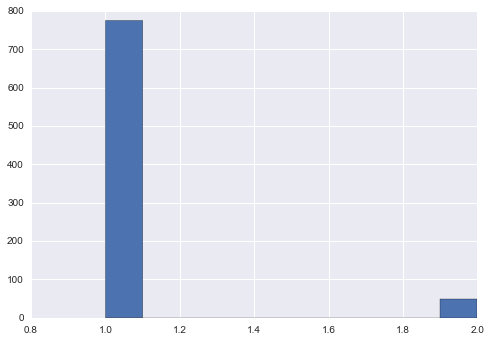

In [79]:
returns_with_xml['num_files'] = returns_with_xml['file_loc'].apply(lambda l: len(l))
returns_with_xml['num_files'].hist()

In [80]:
returns_with_xml['num_files'].value_counts()

1    775
2     50
Name: num_files, dtype: int64

In [87]:
# some have multiple files per year
# for now, let's just focus on the ones with a single file.. 
return_details_df = returns_with_xml.loc[returns_with_xml['num_files']==1].copy()
return_details_df['first_file_loc'] = return_details_df['file_loc'].str[0].astype(str)
return_details_df['full_url'] = return_details_df['first_file_loc']\
.apply(lambda x: 'https://s3.amazonaws.com/irs-form-990/%s_public.xml' % x)
return_details_df.head()

,ein,dataset,exists_in_year,year,EZ,year_str,exists_XML_file,file_loc,num_files,first_file_loc,full_url
1,232222726,py14_EZ.dat,True,14,True,2014,True,[201411339349200016],1,201411339349200016,https://s3.amazonaws.com/irs-form-990/20141133...
7,931016726,py14_EZ.dat,True,14,True,2014,True,[201411189349200016],1,201411189349200016,https://s3.amazonaws.com/irs-form-990/20141118...
14,461060137,py14_EZ.dat,True,14,True,2014,True,[201432599349200313],1,201432599349200313,https://s3.amazonaws.com/irs-form-990/20143259...
22,205717561,py14_EZ.dat,True,14,True,2014,True,[201442239349200849],1,201442239349200849,https://s3.amazonaws.com/irs-form-990/20144223...
23,810401858,py14_EZ.dat,True,14,True,2014,True,[201423219349200322],1,201423219349200322,https://s3.amazonaws.com/irs-form-990/20142321...


In [90]:
return_details_df['first_file_loc'].duplicated().sum()

1

In [91]:
return_details_df['first_file_loc'].isnull().any()

False

In [92]:
print(return_details_df.shape)
return_details_df = return_details_df.drop_duplicates('first_file_loc')
print(return_details_df.shape)

(775, 11)
(774, 11)


In [93]:
!mkdir -p data/xml/

In [101]:
import os
downloaded_files = os.listdir('data/xml')
downloaded_files = [i.replace('.xml', '') for i in downloaded_files]
len(downloaded_files)

447

In [104]:
assert return_details_df.iloc[0]['first_file_loc'] in downloaded_files

In [105]:
import requests
for _,row in return_details_df.iterrows(): #.head().iterrows():
    #print(row)
    if row['first_file_loc'] in downloaded_files:
        continue
    try:
        r = requests.get(row['full_url'], stream=True)
        if r.status_code == 200:
            with open('data/xml/%s.xml' % row['first_file_loc'], 'wb') as f:
                for chunk in r:
                    f.write(chunk)
    except Exception, e:
        print(e, row['first_file_loc'])

In [108]:
!ls -l data/xml | grep '.xml' | wc -l

     774


In [109]:
!du -h data/xml

 28M	data/xml


In [125]:
!grep -rnl data/xml -e '<ProgramServiceRevenue>' | uniq | wc -l

      43


In [126]:
!grep -rnwl data/xml -e '<ProgramServiceRevenue>' | uniq

data/xml/201400489349300030.xml
data/xml/201400509349300425.xml
data/xml/201400599349300025.xml
data/xml/201400879349300010.xml
data/xml/201401069349300705.xml
data/xml/201401279349301545.xml
data/xml/201401329349303255.xml
data/xml/201401339349303925.xml
data/xml/201401359349305930.xml
data/xml/201401929349300415.xml
data/xml/201402269349304200.xml
data/xml/201410469349300136.xml
data/xml/201411189349301211.xml
data/xml/201411299349302866.xml
data/xml/201411329349301996.xml
data/xml/201411349349304756.xml
data/xml/201411349349306436.xml
data/xml/201420719349300812.xml
data/xml/201421339349300637.xml
data/xml/201421349349301927.xml
data/xml/201421359349309282.xml
data/xml/201421419349300012.xml
data/xml/201430239349301113.xml
data/xml/201430319349300428.xml
data/xml/201430629349300433.xml
data/xml/201430889349300403.xml
data/xml/201431329349302053.xml
data/xml/201431359349310108.xml
data/xml/201431399349300013.xml
data/xml/201432269349304808.xml
data/xml/201440439349300509.xml
data/xml

Only 43 of the XML files had that tag!  

They were all 2014?

Looks like coding is different elsewhere..

In [128]:
# redo without the < >
!grep -rnli 'ProgramServiceRevenue' data/xml  | uniq | wc -l

     642


In [130]:
!grep -rnli data/xml -e 'ProgramServiceRevenue' | uniq | tail

data/xml/201641389349200734.xml
data/xml/201641399349200119.xml
data/xml/201641529349300199.xml
data/xml/201641669349301184.xml
data/xml/201641679349300534.xml
data/xml/201641819349300924.xml
data/xml/201641949349300334.xml
data/xml/201642089349300434.xml
data/xml/201642179349301029.xml
data/xml/201642259349300324.xml


Actually most of these don't declare details. Really we want `ProgramServiceRevenueGrp` per `grep -rni -B 5 -A 5 'ProgramServiceRevenueGrp' *`

In [133]:
!grep -rnli 'ProgramServiceRevenueGrp' data/xml  | uniq | wc -l

     267


In [135]:
!grep -rni -B 5 -A 5 'ProgramServiceRevenueGrp' data/xml | grep 'Desc'

data/xml/201401359349303365.xml-371-        <Desc>PSYCH CONTRACT REVENUE</Desc>
data/xml/201401359349303365.xml-371-        <Desc>PSYCH CONTRACT REVENUE</Desc>
data/xml/201401359349303365.xml-377-        <Desc>MEDICAL CONTRACT REVENUE</Desc>
data/xml/201401359349303365.xml-377-        <Desc>MEDICAL CONTRACT REVENUE</Desc>
data/xml/201401359349303365.xml-383-        <Desc>CONFERENCE REGISTRATION</Desc>
data/xml/201401359349303365.xml-383-        <Desc>CONFERENCE REGISTRATION</Desc>
data/xml/201401359349303365.xml-389-        <Desc>MEDICAL PRACTICE REVENUE</Desc>
data/xml/201401359349303365.xml-389-        <Desc>MEDICAL PRACTICE REVENUE</Desc>
data/xml/201401359349303365.xml-395-        <Desc>CAR SEAT RENTAL REVENUE</Desc>
data/xml/201401359349303365.xml-395-        <Desc>CAR SEAT RENTAL REVENUE</Desc>
data/xml/201401439349300500.xml-331-        <Desc>Fees &amp; Contracts Gov Agencies</Desc>
data/xml/201401439349300500.xml-331-        <Desc>Fees &amp; Contracts Gov Agencies</Desc>
data/x

data/xml/201421959349301502.xml-267-        <Desc>IRB FEES</Desc>
data/xml/201421959349301502.xml-267-        <Desc>IRB FEES</Desc>
data/xml/201422259349302287.xml-609-        <Desc>HEALTH INFORM NETWORK</Desc>
data/xml/201422259349302287.xml-609-        <Desc>HEALTH INFORM NETWORK</Desc>
data/xml/201422259349302287.xml-615-        <Desc>ASSIST ELEC HEALTH REC</Desc>
data/xml/201422259349302287.xml-615-        <Desc>ASSIST ELEC HEALTH REC</Desc>
data/xml/201422259349302287.xml-621-        <Desc>HEALTHCARE DELIV RESRC</Desc>
data/xml/201422259349302287.xml-621-        <Desc>HEALTHCARE DELIV RESRC</Desc>
data/xml/201422269349302227.xml-492-        <Desc>RESEARCH GRANT INCOME</Desc>
data/xml/201422269349302227.xml-492-        <Desc>RESEARCH GRANT INCOME</Desc>
data/xml/201422279349303172.xml-367-        <Desc>RESEARCH STUDY FEES</Desc>
data/xml/201422279349303172.xml-367-        <Desc>RESEARCH STUDY FEES</Desc>
data/xml/201422669349300227.xml-342-        <Desc>PROGRAM SERVICE REVENU</Desc

data/xml/201501349349307120.xml-406-        <Desc>Research study revenue</Desc>
data/xml/201501349349307120.xml-406-        <Desc>Research study revenue</Desc>
data/xml/201501409349300220.xml-280-        <Desc>Clinical trial income</Desc>
data/xml/201501409349300220.xml-280-        <Desc>Clinical trial income</Desc>
data/xml/201501809349301550.xml-262-        <Desc>WEBSITE REVENUE</Desc>
data/xml/201501809349301550.xml-262-        <Desc>WEBSITE REVENUE</Desc>
data/xml/201501899349300025.xml-383-        <Desc>PROTOCOL REVENUE</Desc>
data/xml/201501899349300025.xml-383-        <Desc>PROTOCOL REVENUE</Desc>
data/xml/201501909349301505.xml-306-        <Desc>Contract revenue</Desc>
data/xml/201501909349301505.xml-306-        <Desc>Contract revenue</Desc>
data/xml/201502189349300105.xml-550-        <Desc>PATIENT SERVICES</Desc>
data/xml/201502189349300105.xml-550-        <Desc>PATIENT SERVICES</Desc>
data/xml/201502189349300105.xml-556-        <Desc>SCHOOL OF NURSING</Desc>
data/xml/20150218

data/xml/201512229349302271.xml-375-        <Desc>COLLABORATION FEE FROM HHMI 501(C)(3)</Desc>
data/xml/201512229349302271.xml-375-        <Desc>COLLABORATION FEE FROM HHMI 501(C)(3)</Desc>
data/xml/201512269349300221.xml-390-        <ServicesDesc>consulting services</ServicesDesc>
data/xml/201512269349300221.xml-396-        <Desc>PLASMID SALES</Desc>
data/xml/201512269349300221.xml-396-        <Desc>PLASMID SALES</Desc>
data/xml/201513139349300536.xml-614-        <Desc>RESEARCH STUDY REVENUE</Desc>
data/xml/201513139349300536.xml-614-        <Desc>RESEARCH STUDY REVENUE</Desc>
data/xml/201513139349300536.xml-620-        <Desc>MISC. PROGRAM REVENUE</Desc>
data/xml/201513139349300536.xml-620-        <Desc>MISC. PROGRAM REVENUE</Desc>
data/xml/201513139349300536.xml-626-        <Desc>TUITION REVENUE</Desc>
data/xml/201513139349300536.xml-626-        <Desc>TUITION REVENUE</Desc>
data/xml/201513139349300536.xml-632-        <Desc>EECP PROGRAM REVENUE</Desc>
data/xml/201513139349300536.xml-6

data/xml/201530139349301258.xml-419-        <Desc>GENETICS CLINICS</Desc>
data/xml/201530139349301323.xml-461-        <Desc>CONTRACT REVENUE</Desc>
data/xml/201530139349301323.xml-461-        <Desc>CONTRACT REVENUE</Desc>
data/xml/201530359349300218.xml-311-        <Desc>Research revenue</Desc>
data/xml/201530359349300218.xml-311-        <Desc>Research revenue</Desc>
data/xml/201530429349301723.xml-296-        <Desc>PROGRAM SERVICE REVENUE</Desc>
data/xml/201530429349301723.xml-296-        <Desc>PROGRAM SERVICE REVENUE</Desc>
data/xml/201530449349302243.xml-475-        <Desc>CORPORATE REVENUE</Desc>
data/xml/201530449349302243.xml-475-        <Desc>CORPORATE REVENUE</Desc>
data/xml/201530449349302243.xml-480-        <Desc>EDUCATION REVENUE</Desc>
data/xml/201530449349302243.xml-480-        <Desc>EDUCATION REVENUE</Desc>
data/xml/201530449349302243.xml-485-        <Desc>FOUNDATION REVENUE</Desc>
data/xml/201530449349302243.xml-485-        <Desc>FOUNDATION REVENUE</Desc>
data/xml/2015304

data/xml/201541229349300304.xml-344-        <Desc>VA Revenue</Desc>
data/xml/201541229349300304.xml-344-        <Desc>VA Revenue</Desc>
data/xml/201541229349300304.xml-350-        <Desc>Contract Revenue</Desc>
data/xml/201541229349300304.xml-350-        <Desc>Contract Revenue</Desc>
data/xml/201541229349300304.xml-356-        <Desc>Pharmaceutical Revenue CRADA</Desc>
data/xml/201541229349300304.xml-356-        <Desc>Pharmaceutical Revenue CRADA</Desc>
data/xml/201541229349300304.xml-362-        <Desc>Federal Revenue</Desc>
data/xml/201541229349300304.xml-362-        <Desc>Federal Revenue</Desc>
data/xml/201541229349300304.xml-368-        <Desc>Nursing Conference Revenue</Desc>
data/xml/201541229349300304.xml-368-        <Desc>Nursing Conference Revenue</Desc>
data/xml/201541339349301729.xml-389-        <Desc>RESIDENCY PROGRAM</Desc>
data/xml/201541339349301729.xml-389-        <Desc>RESIDENCY PROGRAM</Desc>
data/xml/201541339349301729.xml-395-        <Desc>RESEARCH REVENUE</Desc>
data/x

data/xml/201601459349300515.xml-311-        <Desc>PROGRAM SERVICES REVENUE</Desc>
data/xml/201601459349300515.xml-311-        <Desc>PROGRAM SERVICES REVENUE</Desc>
data/xml/201601529349300550.xml-370-        <Desc>Research study revenue</Desc>
data/xml/201601529349300550.xml-370-        <Desc>Research study revenue</Desc>
data/xml/201601549349300700.xml-379-        <Desc>PROJECT REVENUE</Desc>
data/xml/201601549349300700.xml-379-        <Desc>PROJECT REVENUE</Desc>
data/xml/201601589349300220.xml-282-        <Desc>BUILDING RENT INCOME</Desc>
data/xml/201601589349300220.xml-282-        <Desc>BUILDING RENT INCOME</Desc>
data/xml/201601589349300220.xml-287-        <Desc>LAB FEES</Desc>
data/xml/201601589349300220.xml-287-        <Desc>LAB FEES</Desc>
data/xml/201601589349300220.xml-292-        <Desc>CONFERENCE REVENUE</Desc>
data/xml/201601589349300220.xml-292-        <Desc>CONFERENCE REVENUE</Desc>
data/xml/201601699349300320.xml-255-        <Desc>PROGRAM SVC. REVENUE</Desc>
data/xml/201

data/xml/201631329349304033.xml-613-        <Desc>FOUNDATION PROGRAM FUNDING</Desc>
data/xml/201631329349304033.xml-613-        <Desc>FOUNDATION PROGRAM FUNDING</Desc>
data/xml/201631329349304033.xml-619-        <Desc>NET ASSETS RELEASED FROM RESTRICTION</Desc>
data/xml/201631329349304033.xml-619-        <Desc>NET ASSETS RELEASED FROM RESTRICTION</Desc>
data/xml/201631339349301973.xml-414-        <Desc>PHARMACEUTICAL STUDIES</Desc>
data/xml/201631339349301973.xml-414-        <Desc>PHARMACEUTICAL STUDIES</Desc>
data/xml/201631339349301973.xml-420-        <Desc>IRB REVENUE</Desc>
data/xml/201631339349301973.xml-420-        <Desc>IRB REVENUE</Desc>
data/xml/201631339349304088.xml-542-        <Desc>SERVICE REVENUE</Desc>
data/xml/201631339349304088.xml-542-        <Desc>SERVICE REVENUE</Desc>
data/xml/201631349349303678.xml-327-        <Desc>PSYCH CONTRACT REVENUE</Desc>
data/xml/201631349349303678.xml-327-        <Desc>PSYCH CONTRACT REVENUE</Desc>
data/xml/201631349349303678.xml-333-    

In [136]:
! echo 'data/xml/201641949349300334.xml-576-        <Desc>RESEARCH REVENUE</Desc>'|grep -Po '<Desc>\K[^"]*'

usage: grep [-abcDEFGHhIiJLlmnOoqRSsUVvwxZ] [-A num] [-B num] [-C[num]]
	[-e pattern] [-f file] [--binary-files=value] [--color=when]
	[--context[=num]] [--directories=action] [--label] [--line-buffered]
	[--null] [pattern] [file ...]


In [139]:
!echo "This is 02G05 a test string 20-Jul-2012\nThis is 02G05 a test string 20-Jul-2012" | egrep -o '[0-9]+G[0-9]+'

02G05
02G05


In [141]:
! echo 'data/xml/201641949349300334.xml-576-        <Desc>RESEARCH REVENUE</Desc>'|egrep -o '<Desc>(.+)</Desc>'

<Desc>RESEARCH REVENUE</Desc>


In [143]:
!grep -rni -B 5 -A 5 'ProgramServiceRevenueGrp' data/xml | grep 'Desc'|egrep -o '<Desc>(.+)</Desc>' | uniq | wc -l 

     521


So 267 returns have 521 unique program service revenue descriptions.

Here they are:

In [142]:
!grep -rni -B 5 -A 5 'ProgramServiceRevenueGrp' data/xml | grep 'Desc'|egrep -o '<Desc>(.+)</Desc>' | uniq

<Desc>PSYCH CONTRACT REVENUE</Desc>
<Desc>MEDICAL CONTRACT REVENUE</Desc>
<Desc>CONFERENCE REGISTRATION</Desc>
<Desc>MEDICAL PRACTICE REVENUE</Desc>
<Desc>CAR SEAT RENTAL REVENUE</Desc>
<Desc>Fees &amp; Contracts Gov Agencies</Desc>
<Desc>RESEARCH FEES</Desc>
<Desc>PROGRAM SERVICE REVENUE</Desc>
<Desc>PATIENT SERVICES</Desc>
<Desc>SCHOOL OF NURSING</Desc>
<Desc>CAFETERIA</Desc>
<Desc>THRIFT/GIFT SHOP</Desc>
<Desc>PROGRAM FEES</Desc>
<Desc>PROGRAM SVC. REVENUE</Desc>
<Desc>PROJECT REVENUE</Desc>
<Desc>CONTRIBUTIONSMEMORIALS</Desc>
<Desc>MEDICAL CONFERENCES</Desc>
<Desc>EDUCATION &amp; RESEARCH</Desc>
<Desc>PATIENT FEES</Desc>
<Desc>MEDICAL RESEARCH</Desc>
<Desc>CONSORTIUM REVENUE</Desc>
<Desc>CONTRACT REVENUE</Desc>
<Desc>A/P SETTLEMENT</Desc>
<Desc>GOVERNMENT CONTRACTS</Desc>
<Desc>OTHER GRANT INCOME</Desc>
<Desc>LABORATORY INCOME</Desc>
<Desc>INTELLECTUAL PROPERTY INCOME</Desc>
<Desc>MISC NON-OPER INCOME</Desc>
<Desc>REGISTRATION FEES</Desc>
<Desc>PROF SERV INVOME</Desc>
<Desc>PUBLICA

<Desc>REPAYMENT OF RENT</Desc>
<Desc>THERAPY INCOME</Desc>
<Desc>ORTHOTICS INCOME</Desc>
<Desc>STAFF PHYSICIAN INCOME</Desc>
<Desc>MISCELLANEOUS REVENUE</Desc>
<Desc>PATIENT SERVICES</Desc>
<Desc>PROGRAM SERVICES REVENUE</Desc>
<Desc>CLINICAL AND LABORATORY SERVICE</Desc>
<Desc>GENETICS CLINICS</Desc>
<Desc>CONTRACT REVENUE</Desc>
<Desc>Research revenue</Desc>
<Desc>PROGRAM SERVICE REVENUE</Desc>
<Desc>CORPORATE REVENUE</Desc>
<Desc>EDUCATION REVENUE</Desc>
<Desc>FOUNDATION REVENUE</Desc>
<Desc>IPA REIMBURSEMENTS</Desc>
<Desc>Other Sales and Service</Desc>
<Desc>PROGRAM INCOME</Desc>
<Desc>PROGRAM SERVICE REVENUE</Desc>
<Desc>HOSPITAL DUES</Desc>
<Desc>RENTAL INCOME</Desc>
<Desc>TV &amp; FILM ROYALTIES</Desc>
<Desc>VA DOD PTSD</Desc>
<Desc>DR. TADDEI (BAYER)</Desc>
<Desc>DR. KRYGER(RESPRONICS)</Desc>
<Desc>HENRY JACKSON FOUNDATI</Desc>
<Desc>CSP 453A</Desc>
<Desc>CONSULTING</Desc>
<Desc>CONFERENCE REGISTRATIO</Desc>
<Desc>PHARMACEUTICAL STUDIES</Desc>
<Desc>IRB REVENUE</Desc>
<Desc>Res

# TODO

How many unique organizations are these 200+ "detailed returns" coming from?

Can we group these revenue description codes into a few categories -- especially automatically?

We found ~645 unique MROs. ~340 of them had records for all 3 years. Are the rest just new organizations that started in 2015/16? Or are there really "missing" years (e.g. files in 2014 and 2016, but not in 2015)? On the flip side, how many MROs file only in 2014 and then disappear (maybe they close)?

Export a list of properly-deduped revenue description codes for us to annotate